#          >>>>>> DATA PROCESSING and MODEL BUILDING <<<<<<

In [39]:
#import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"/kaggle/input/rprsdf/HR-Employee-Attrition-cleaned-data.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Intermediate,Life Sciences,Medium,Female,...,Excellent,Poor,0,8,0,Poor,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Schooling,Life Sciences,High,Male,...,Outstanding,Outstanding,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Intermediate,Other,Very high,Male,...,Excellent,Good,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Masters,Life Sciences,Very high,Female,...,Excellent,Excellent,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Schooling,Medical,Low,Male,...,Excellent,Outstanding,1,6,3,Better,2,2,2,2


In [3]:
df.duplicated().sum()

0

In [4]:
numerical_cols = df.select_dtypes(include = 'int')
categorical_cols = df.select_dtypes(include = 'object')

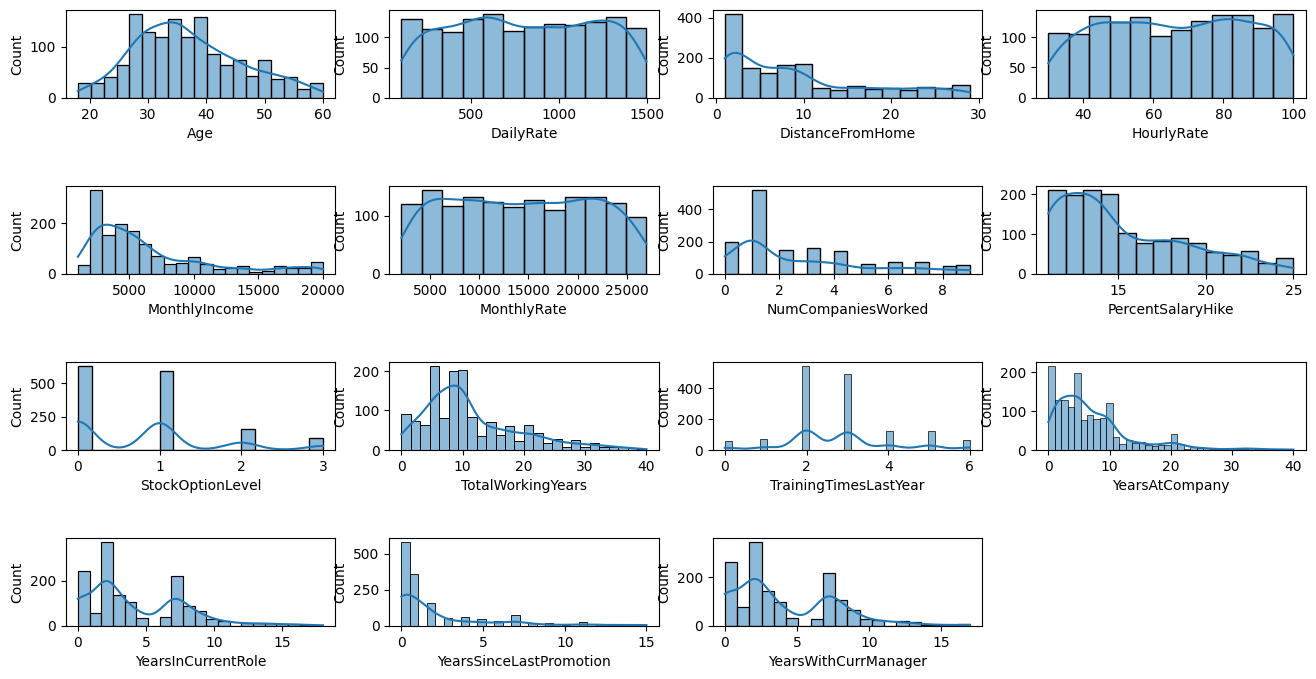

In [5]:
plt.figure(figsize = (16,8))
for i,k in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[k], kde = True) 
plt.subplots_adjust(hspace=1)
plt.show()

As we see from above the spread of the data is biased for most of the features. The features should be scaled such that that no single feature dominates the distance calculations in an algorithm, and can help to improve the performance of the model.

<Axes: ylabel='count'>

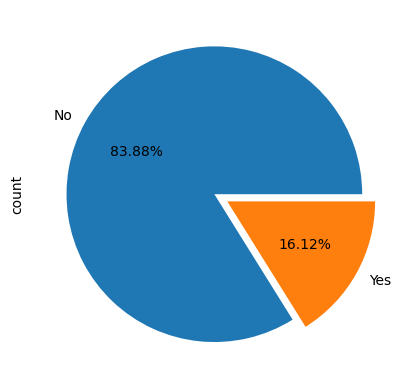

In [6]:
df['Attrition'].value_counts().plot.pie(explode=[0,0.1], autopct="%.2f%%")

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [10]:
df = df[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager','Attrition']]

**Encoding**

In [11]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

In [12]:
#OneHotEncoding
df = pd.get_dummies(df)

In [13]:
x = df.drop('Attrition', axis = 1)
y = df['Attrition']

As we see here the target category is high biased to 'No', So there is a need for OverSampling of the data to counter bias condition.

Here we use SMOT Technique for oversampling beacause SMOT can generate new samples in by interpolation.

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
xr, yr = sm.fit_resample(x, y)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

xs = scl.fit_transform(xr)

In [28]:
#Train Test Split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(xs,yr,stratify = yr, random_state = 1)

# Model 1 => Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(xtrain,ytrain)

LogisticRegression()

In [30]:
#Accuracy Testing
print(f"Train Data Accuracy = {model1.score(xtrain,ytrain)}")
print(f"Test Data Accuracy = {model1.score(xtest,ytest)}")

Train Data Accuracy = 0.9394267171444024
Test Data Accuracy = 0.9303079416531604


In [34]:
#Confusion matrix for Train
from sklearn.metrics import confusion_matrix
train_confusion_matrix = confusion_matrix(ytrain , model1.predict(xtrain))
train_confusion_matrix

array([[907,  18],
       [ 94, 830]])

In [35]:
train_confusion_matrix_percentage = train_confusion_matrix/train_confusion_matrix.sum(axis=1).reshape(-1,1)
train_confusion_matrix_percentage

array([[0.98054054, 0.01945946],
       [0.1017316 , 0.8982684 ]])

In [36]:
#Confusion matrix for Test
from sklearn.metrics import confusion_matrix
test_confusion_matrix = confusion_matrix(ytest , model1.predict(xtest))
test_confusion_matrix

array([[294,  14],
       [ 29, 280]])

In [37]:
test_confusion_matrix_percentage = test_confusion_matrix/test_confusion_matrix.sum(axis=1).reshape(-1,1)
test_confusion_matrix_percentage

array([[0.95454545, 0.04545455],
       [0.09385113, 0.90614887]])

In [41]:
print(classification_report(ytrain,model1.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       925
           1       0.98      0.90      0.94       924

    accuracy                           0.94      1849
   macro avg       0.94      0.94      0.94      1849
weighted avg       0.94      0.94      0.94      1849



In [42]:
print(classification_report(ytest,model1.predict(xtest)))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       308
           1       0.95      0.91      0.93       309

    accuracy                           0.93       617
   macro avg       0.93      0.93      0.93       617
weighted avg       0.93      0.93      0.93       617



In [147]:
from sklearn.metrics import roc_auc_score,roc_curve
auc_score_train = roc_auc_score(ytrain , model1.predict_proba(xtrain)[:,1])
print("AUC_Train" , auc_score_train)

AUC_Train 0.9799040599040598


In [148]:
auc_score_train = roc_auc_score(ytrain , model1.predict_proba(xtrain)[:,1])
print("AUC_Train" , auc_score_train)

AUC_Train 0.9799040599040598


In [149]:
auc_score_test = roc_auc_score(ytest , model1.predict_proba(xtest)[:,1])
print("AUC_Test" , auc_score_test)

AUC_Test 0.9715882822678941


In [150]:
fpr,tpr,thresh = roc_curve(ytrain , model1.predict_proba(xtrain)[:,1])

In [151]:
#threshold at which tpr is max with minimum fpr => tpr * (1-fpr) is maximum

g_val = tpr * (1-fpr)
print(g_val.max() , g_val.argmax())

0.8837346437346437 44


In [152]:
print(g_val.max() , g_val.argmax())

0.8837346437346437 44


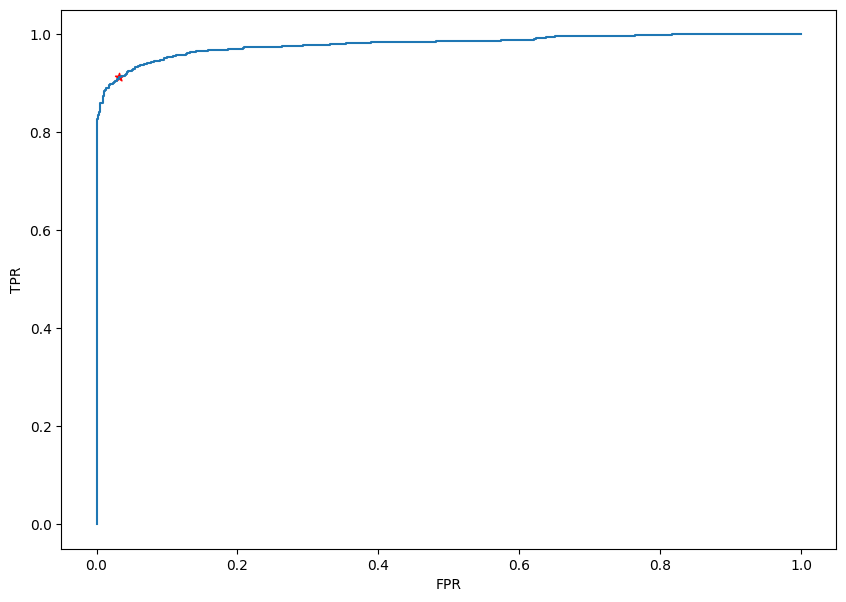

In [153]:
plt.figure(figsize = (10,7))
plt.plot(fpr , tpr)
plt.scatter(fpr[44] , tpr[44] , marker = "*" , c='r')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# Model 2 KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()

model2.fit(xtrain,ytrain)

print(f"Train Data Accuracy = {model2.score(xtrain,ytrain)}")
print(f"Test Data Accuracy = {model2.score(xtest,ytest)}")

Train Data Accuracy = 0.9361817198485668
Test Data Accuracy = 0.899513776337115


In [98]:
#Confusion matrix for Train
from sklearn.metrics import confusion_matrix
train_confusion_matrix = confusion_matrix(ytrain , model2.predict(xtrain))
train_confusion_matrix

array([[825, 100],
       [ 18, 906]])

In [99]:
train_confusion_matrix_percentage = train_confusion_matrix/train_confusion_matrix.sum(axis=1).reshape(-1,1)
train_confusion_matrix_percentage

array([[0.89189189, 0.10810811],
       [0.01948052, 0.98051948]])

In [100]:
#Confusion matrix for Test
from sklearn.metrics import confusion_matrix
test_confusion_matrix = confusion_matrix(ytest , model2.predict(xtest))
test_confusion_matrix

array([[254,  54],
       [  8, 301]])

In [101]:
test_confusion_matrix_percentage = test_confusion_matrix/test_confusion_matrix.sum(axis=1).reshape(-1,1)
test_confusion_matrix_percentage

array([[0.82467532, 0.17532468],
       [0.02588997, 0.97411003]])

In [102]:
print(classification_report(ytrain,model2.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       925
           1       0.90      0.98      0.94       924

    accuracy                           0.94      1849
   macro avg       0.94      0.94      0.94      1849
weighted avg       0.94      0.94      0.94      1849



In [103]:
print(classification_report(ytest,model2.predict(xtest)))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       308
           1       0.85      0.97      0.91       309

    accuracy                           0.90       617
   macro avg       0.91      0.90      0.90       617
weighted avg       0.91      0.90      0.90       617



In [104]:
from sklearn.metrics import roc_auc_score,roc_curve
auc_score_train = roc_auc_score(ytrain , model2.predict_proba(xtrain)[:,1])
print("AUC_Train" , auc_score_train)

AUC_Train 0.9917263367263368


In [105]:
auc_score_train = roc_auc_score(ytrain , model2.predict_proba(xtrain)[:,1])
print("AUC_Train" , auc_score_train)

AUC_Train 0.9917263367263368


In [106]:
auc_score_test = roc_auc_score(ytest , model2.predict_proba(xtest)[:,1])
print("AUC_Test" , auc_score_test)

AUC_Test 0.9783865002311605


In [110]:
fprknn, tprknn, threshknn = roc_curve(ytrain,model2.predict_proba(xtrain)[:,1])

#threshold at which tpr is max with minimum fpr => tpr * (1-fpr) is maximum
g_valknn = tprknn * (1-fprknn)
print(g_valknn.max() , g_valknn.argmax())

0.9140049140049141 2


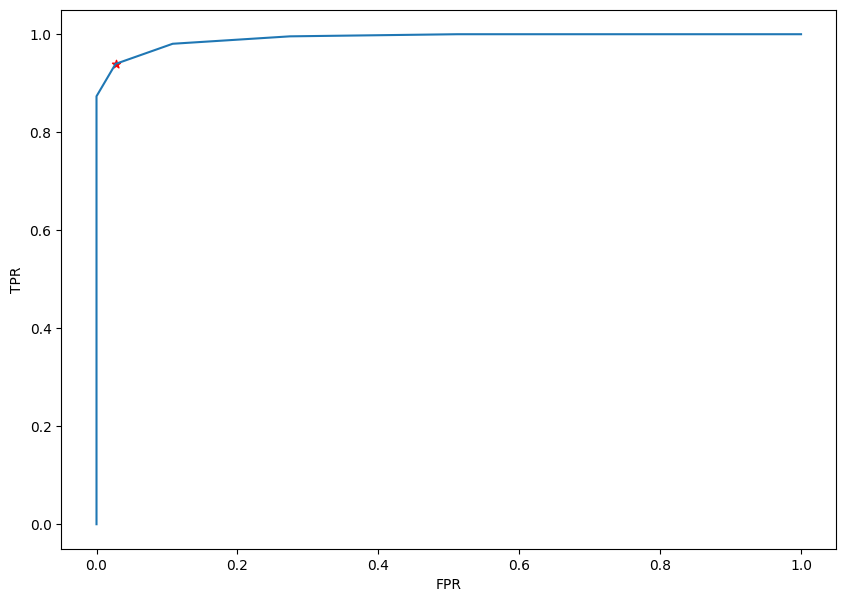

In [112]:
plt.figure(figsize = (10,7))
plt.plot(fprknn , tprknn)
plt.scatter(fprknn[2] , tprknn[2] , marker = "*" , c='r')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# Model 3 => Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model3 = DecisionTreeClassifier()

param_grid = {
    'max_depth' : [None,1,2,3,4],
    'min_samples_split' : [5,7,9,10,11],
    'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10]
}

#Create a GridSearchCV object
grid_search = GridSearchCV(model3 , param_grid , cv=5)

#fit the data into grid search object
grid_search.fit(xtrain,ytrain)

#Best Hyperparameter
print("Best Hyperparameter:" , grid_search.best_params_)

Best Hyperparameter: {'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 5}


In [117]:
#Get the best model
model3 = grid_search.best_estimator_

#Evaluate on train data
print("Train Data Accuracy-", model3.score(xtrain,ytrain))

#Evaluate accuracy on test data
print("Test Data Accuracy-", model3.score(xtest,ytest))

Train Data Accuracy- 0.9318550567874527
Test Data Accuracy- 0.8476499189627229


In [121]:
#Confusion matrix for Train
from sklearn.metrics import confusion_matrix
train_confusion_matrix = confusion_matrix(ytrain , model3.predict(xtrain))
train_confusion_matrix

array([[907,  18],
       [ 94, 830]])

In [122]:
train_confusion_matrix_percentage = train_confusion_matrix/train_confusion_matrix.sum(axis=1).reshape(-1,1)
train_confusion_matrix_percentage

array([[0.98054054, 0.01945946],
       [0.1017316 , 0.8982684 ]])

In [123]:
#Confusion matrix for Test
from sklearn.metrics import confusion_matrix
test_confusion_matrix = confusion_matrix(ytest , model3.predict(xtest))
test_confusion_matrix

array([[263,  45],
       [ 49, 260]])

In [124]:
test_confusion_matrix_percentage = test_confusion_matrix/test_confusion_matrix.sum(axis=1).reshape(-1,1)
test_confusion_matrix_percentage

array([[0.8538961 , 0.1461039 ],
       [0.15857605, 0.84142395]])

In [125]:
print(classification_report(ytrain,model3.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       925
           1       0.96      0.90      0.93       924

    accuracy                           0.93      1849
   macro avg       0.93      0.93      0.93      1849
weighted avg       0.93      0.93      0.93      1849



In [126]:
print(classification_report(ytest,model3.predict(xtest)))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       308
           1       0.85      0.84      0.85       309

    accuracy                           0.85       617
   macro avg       0.85      0.85      0.85       617
weighted avg       0.85      0.85      0.85       617



In [127]:
from sklearn.metrics import roc_auc_score,roc_curve
auc_score_train = roc_auc_score(ytrain , model3.predict_proba(xtrain)[:,1])
print("AUC_Train" , auc_score_train)

AUC_Train 0.9884637884637885


In [128]:
auc_score_train = roc_auc_score(ytrain , model3.predict_proba(xtrain)[:,1])
print("AUC_Train" , auc_score_train)

AUC_Train 0.9884637884637885


In [129]:
auc_score_test = roc_auc_score(ytest , model3.predict_proba(xtest)[:,1])
print("AUC_Test" , auc_score_test)

AUC_Test 0.9010002942041777


In [132]:
dcfpr,dctpr,dcthresh = roc_curve(ytrain , model3.predict_proba(xtrain)[:,1])

#threshold at which tpr is max with minimum fpr => tpr * (1-fpr) is maximum

dcg_val = dctpr * (1-fpr)
print(dcg_val.max() , dcg_val.argmax())

0.8683467883467882 11


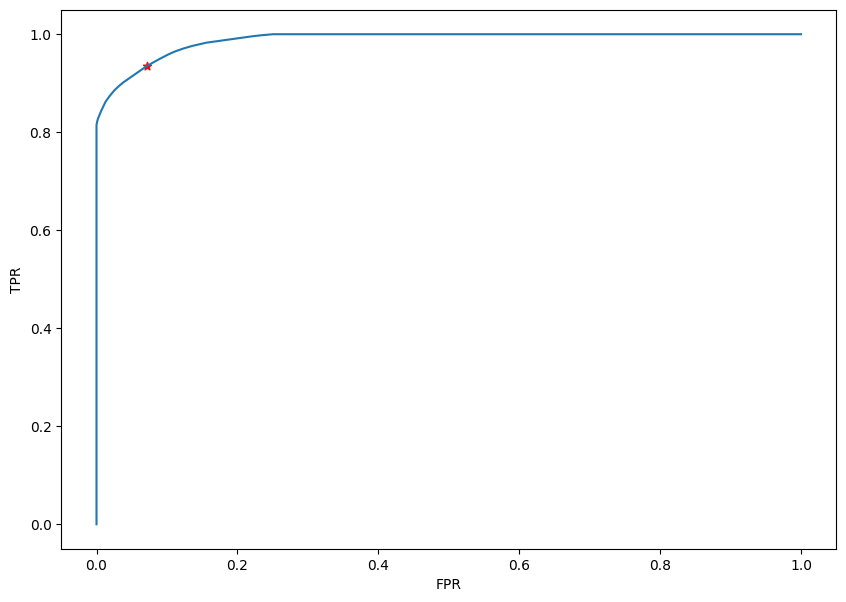

In [154]:
plt.figure(figsize = (10,7))
plt.plot(dcfpr , dctpr)
plt.scatter(dcfpr[11] , dctpr[11] , marker = "*" , c='r')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# Model 4 => Random Forest

In [157]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier()

param_grid = {
    'n_estimators' : [5,10,20,40,80],
    'max_depth' : [None,1,2,3,4],
    'min_samples_split' : [5,7,9,10,11],
    'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10]
}

#Create a GridSearchCV object
grid_search = GridSearchCV(model4 , param_grid , cv=5)

#fit the data into grid search object
grid_search.fit(xtrain,ytrain)

#Best Hyperparameter
print("Best Hyperparameter:" , grid_search.best_params_)

Best Hyperparameter: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 40}


In [158]:
model4 = grid_search.best_estimator_

#Evaluate on train data
print("Train Data Accuracy-", model4.score(xtrain,ytrain))

#Evaluate accuracy on test data
print("Test Data Accuracy-", model4.score(xtest,ytest))

Train Data Accuracy- 0.9924283396430503
Test Data Accuracy- 0.9303079416531604


In [159]:
#Confusion matrix for Train
from sklearn.metrics import confusion_matrix
train_confusion_matrix = confusion_matrix(ytrain , model4.predict(xtrain))
train_confusion_matrix

array([[925,   0],
       [ 14, 910]])

In [160]:
train_confusion_matrix_percentage = train_confusion_matrix/train_confusion_matrix.sum(axis=1).reshape(-1,1)
train_confusion_matrix_percentage

array([[1.        , 0.        ],
       [0.01515152, 0.98484848]])

In [161]:
#Confusion matrix for Test
from sklearn.metrics import confusion_matrix
test_confusion_matrix = confusion_matrix(ytest , model4.predict(xtest))
test_confusion_matrix

array([[296,  12],
       [ 31, 278]])

In [162]:
test_confusion_matrix_percentage = test_confusion_matrix/test_confusion_matrix.sum(axis=1).reshape(-1,1)
test_confusion_matrix_percentage

array([[0.96103896, 0.03896104],
       [0.10032362, 0.89967638]])

In [163]:
print(classification_report(ytrain,model4.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       925
           1       1.00      0.98      0.99       924

    accuracy                           0.99      1849
   macro avg       0.99      0.99      0.99      1849
weighted avg       0.99      0.99      0.99      1849



In [164]:
print(classification_report(ytest,model4.predict(xtest)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       308
           1       0.96      0.90      0.93       309

    accuracy                           0.93       617
   macro avg       0.93      0.93      0.93       617
weighted avg       0.93      0.93      0.93       617



In [165]:
from sklearn.metrics import roc_auc_score,roc_curve
auc_score_train = roc_auc_score(ytrain , model4.predict_proba(xtrain)[:,1])
print("AUC_Train" , auc_score_train)

AUC_Train 0.99995436995437


In [166]:
auc_score_train = roc_auc_score(ytrain , model4.predict_proba(xtrain)[:,1])
print("AUC_Train" , auc_score_train)

AUC_Train 0.99995436995437


In [167]:
auc_score_test = roc_auc_score(ytest , model4.predict_proba(xtest)[:,1])
print("AUC_Test" , auc_score_test)

AUC_Test 0.9823372420459798


In [168]:
rffpr,rftpr,thresh = roc_curve(ytrain , model4.predict_proba(xtrain)[:,1])

In [169]:
#threshold at which rftpr is max with minimum rffpr => rftpr * (1-rffpr) is maximum

rfg_val = rftpr * (1-rffpr)
print(rfg_val.max() , rfg_val.argmax())


0.9945992745992747 147


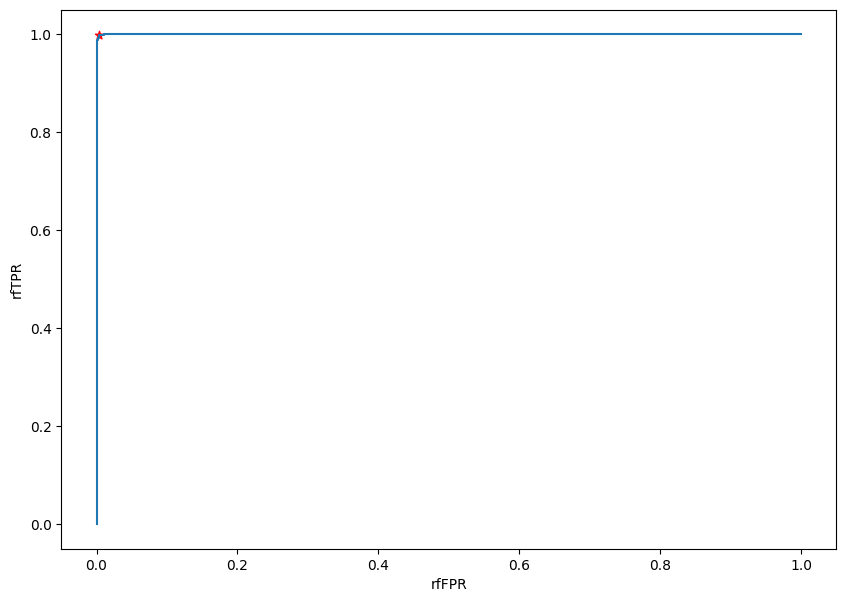

In [171]:
plt.figure(figsize = (10,7))
plt.plot(rffpr , rftpr)
plt.scatter(rffpr[147] , rftpr[147] , marker = "*" , c='r')
plt.xlabel("rfFPR")
plt.ylabel("rfTPR")
plt.show()

# Model 5 => SVM

In [172]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [174]:
from sklearn.model_selection import GridSearchCV
model5 = svm.SVC()

param_grid = {'kernel' : ['linear','poly','rbf'],
              'degree' : [1,3,5,7,9],
              'gamma' : [0.001,0.01,0.1,1],
              'C':[0.1,1,10,100]}

grid_search = GridSearchCV(estimator=model5, param_grid=param_grid , cv=5, scoring='accuracy')
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [1, 3, 5, 7, 9],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [198]:
#Best Hyperparameter
print("Best Hyperparameter:" , grid_search.best_params_)

Best Hyperparameter: {'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [179]:
model5 = grid_search.best_estimator_

ytrainP = model5.predict(xtrain)
ytestP = model5.predict(xtest)

accuracy_train = accuracy_score(ytrain,ytrainP)
accuracy_test = accuracy_score(ytest,ytestP)

print(f"Accuracy (Train Data) : {accuracy_train}")
print(f"Accuracy (Test Data) : {accuracy_test}")

Accuracy (Train Data) : 0.942671714440238
Accuracy (Test Data) : 0.9384116693679092


In [180]:
#Confusion matrix for Train
from sklearn.metrics import confusion_matrix
train_confusion_matrix = confusion_matrix(ytrain , model5.predict(xtrain))
train_confusion_matrix

array([[917,   8],
       [ 98, 826]])

In [181]:
train_confusion_matrix_percentage = train_confusion_matrix/train_confusion_matrix.sum(axis=1).reshape(-1,1)
train_confusion_matrix_percentage

array([[0.99135135, 0.00864865],
       [0.10606061, 0.89393939]])

In [182]:
#Confusion matrix for Test
from sklearn.metrics import confusion_matrix
test_confusion_matrix = confusion_matrix(ytest , model5.predict(xtest))
test_confusion_matrix

array([[302,   6],
       [ 32, 277]])

In [183]:
test_confusion_matrix_percentage = test_confusion_matrix/test_confusion_matrix.sum(axis=1).reshape(-1,1)
test_confusion_matrix_percentage

array([[0.98051948, 0.01948052],
       [0.10355987, 0.89644013]])

In [184]:
print(classification_report(ytrain,model5.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       925
           1       0.99      0.89      0.94       924

    accuracy                           0.94      1849
   macro avg       0.95      0.94      0.94      1849
weighted avg       0.95      0.94      0.94      1849



In [185]:
print(classification_report(ytest,model5.predict(xtest)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       308
           1       0.98      0.90      0.94       309

    accuracy                           0.94       617
   macro avg       0.94      0.94      0.94       617
weighted avg       0.94      0.94      0.94       617



# Model Selection

1. We consider recall as the good parameter for this business example.
2. Beacause recall determines that how correctly the model identifies positive instances.
3. Here the business problem is the company does'nt wants to loose the current working employees.
3. This helps in taking care of those employees who are likely to increase attrition rate.
4. We also consider other parameters with less weightage. 

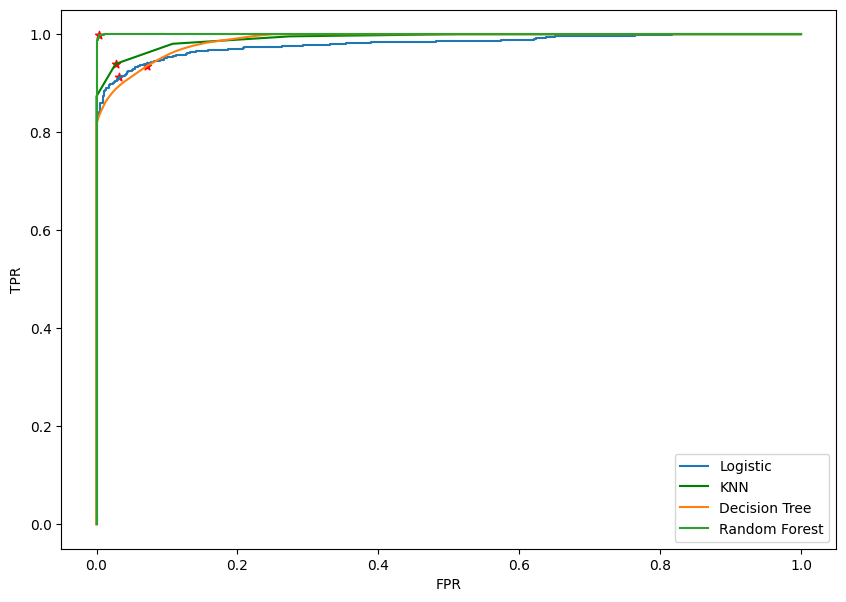

In [194]:
plt.figure(figsize = (10,7))

plt.plot(fpr , tpr , label = 'Logistic')
plt.plot(fprknn , tprknn , 'g' , label = 'KNN')
plt.plot(dcfpr , dctpr , label = 'Decision Tree')
plt.plot(rffpr , rftpr, label = 'Random Forest')

plt.scatter(fpr[44] , tpr[44] , marker = "*" , c='r')
plt.scatter(fprknn[2] , tprknn[2] , marker = "*" , c='r')
plt.scatter(dcfpr[11] , dctpr[11] , marker = "*" , c='r')
plt.scatter(rffpr[147] , rftpr[147] , marker = "*" , c='r')

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.legend()
plt.show()

1. On performing these steps the **SVM model** is good for this business case.
2. Svm Had a good recall and accuracy.